---
# SDF Bac à sable
---

# EXO 7.1 rendre périodique
---
L'[Exo 7 poly page 97](https://moodle.insa-toulouse.fr/mod/resource/view.php?id=24741#page=97)

Les signaux sont définis sur **un intervalle qui n'est pas forcément la période!**. 

Par exemple ici la fonction $t\mapsto \sin(t)$ est donnée sur un support $\left[0 , \pi \right]$

Affichons cette fonction sur son support :



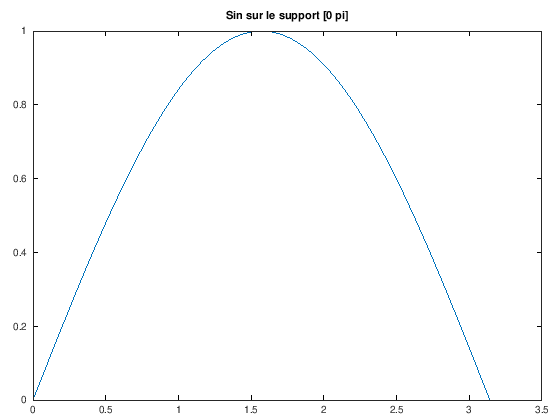

In [57]:
clear all;
signaux_de_base ;
t=0:pi/100:pi;
plot(t,sin(t));
title("Sin sur le support [0 pi]")

Le développement en série $ \frac{2}{\pi}− \frac{4}{\pi}\sum\limits_{n=1}^{+\infty} \cos(2.n.t) $ lui est défini sur $\mathbb{R}$ et doit avoir une période.

On sait juste que sur l'intervalle $\left[0; \pi\right]$ la limite de cetet série converge simplement vers $f(t)$.


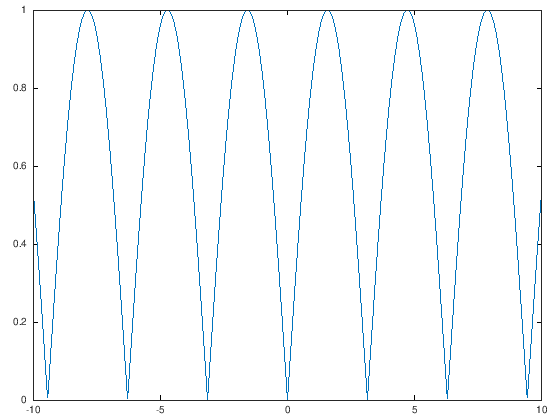

In [64]:
T0 = pi;
fperio = @(t) fpaire(mod(t,T0));
tt = -10:0.01:10;
plot(tt,fperio(tt))

Regardons si les premier termes collent :


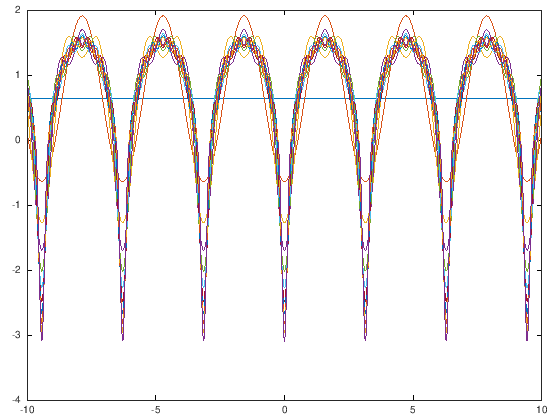

In [72]:
somme = cos(0*tt)*2/pi;
plot(tt,somme); hold on;
for n=1:10
    somme = somme - 4/pi/n*cos(n*tt*2);
    plot(tt,somme)
end

## EXO 1.3 rendre périodique
---

L' [Exo 1.3 poly page 94](https://moodle.insa-toulouse.fr/mod/resource/view.php?id=24741#section.5.9) dessine une fonction sur un intervalle donné. Il faut savoir la définir puis la rendre périodique (chose évoquée sur le graphique par les ...) 

Définissons d'abord cette fonction $f$ en fonction du paramètre $T_0$ à l'aide d'échelons retardés

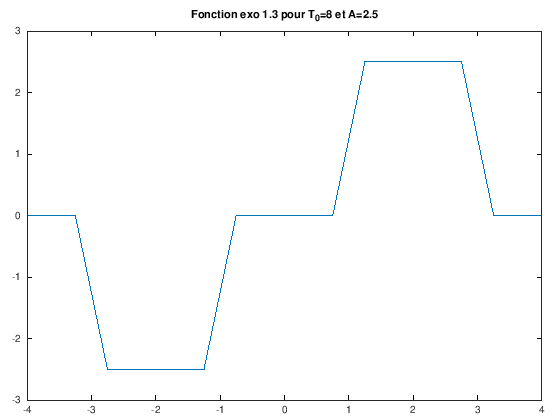

In [52]:
signaux_de_base %% importe les fonctions déjà définies
T0=8; % Il faut bien donner une valeur en numérique
A=2.5; % à A et T0 pour faire un tracé
t = -T0/2:T0/32:T0/2;
f = @(t)       A*(- u(t+3*T0/8)+u(t+T0/8)+u(t-T0/8)-u(t-3*T0/8)) ;  % Utiloise les fonctions lambda
plot(t,f(t),'-');
title ("Fonction exo 1.3 pour T_0=8 et A=2.5")

Elle est définie par le graphique entre $[-\frac{T_0}{2}, \frac{T_0}{2}]$ uniquement.   
On peut en faire un prolongement périodique pour la définir partout et pouvoir appliquer un développement en Séries de Fourier (SdF).

> **Les SdF ne s'appliquent qu'à des signaux périodiques !**

On peut choisir une périodicité $T$ quelconque à condition d'avoir $T>T_0$ dans ce cas qui est la longueur du support définit. On pourrait **choisir une période plus longue que $T_0$ !** mais le nom du paramètre $T_0$ nous incite à croire que l'on veut une périodicité $T=T_0$.

On veut donc prolonger $f : \left[-\frac{T_0}{2}, \frac{T_0}{2}\right] \to \mathbb{C}$ (A pourrait être un nombre complexe...) en une fonction $\tilde{f} :  \mathbb{R} \to \mathbb{C}$ telle que :   
$\underbrace{\forall t\in\mathbb{R},\quad  \tilde{f}(t+T_0)=\tilde{f}(t)}_{\tilde{f}\text{ est } T_0 \text{ périodique}} \quad\text{ET} \quad \underbrace{\forall t\in \left[-\frac{T_0}{2}, \frac{T_0}{2}\right], \quad f(t)=\tilde{f}(t)}_{\tilde{f} \text{ prolonge }f}$

que l'on peut traduire :

$ \forall t\in\mathbb{R}, \exists! n\in\mathbb{Z}\quad  | \quad t=t'+n\,T_0 \quad\text{ ET }\quad t' \in  \left[-\frac{T_0}{2}, \frac{T_0}{2}\right]\quad  \text{ ET } \quad \tilde{f}(t)=f(t') $

Le support $t'\in\left[-\frac{T_0}{2}, \frac{T_0}{2}\right]$ n'est pas entièrement positif, on aimerait avoir $t''\in\left[0,T_0\right]$ pour pouvoir utiliser l'opérateur *modulo $T_0$* on décale donc $t''=t'+\frac{T_0}{2}$ en :

$ \forall t\in\mathbb{R}, \exists! n\in\mathbb{Z}\quad  | \quad t=\underbrace{t''-\frac{T_0}{2}}_{t'}+n\,T_0 \quad \text{ ET } \quad \underbrace{t''}_{t'+\frac{T_0}{2}} \in  \left[0, T_0\right] \quad \text{ ET } \quad \tilde{f}(t)=f(\underbrace{t''-\frac{T_0}{2}}_{t'}) $

Qui permet de formuler $t'' = \underbrace{\left(t - n\, T_0\right)}_{t \, [T_0]} +\frac{T_0}{2} = \underbrace{\left(t  +\frac{T_0}{2} - n\, T_0\right)}_{\left(t+\frac{T_0}{2}\right) \, [T_0]} $

$ \forall t\in\mathbb{R}, \tilde{f}(t)=f\left(\overbrace{\underbrace{\left(t+\frac{T_0}{2}\right)\,[T_0]}_{t''} -\frac{T_0}{2}}^{t'}\right) $

où $x\, [y]$ désigne $x$ modulo $y$ qui s'écrit en octave `mod(x,y)` est tel que $x = n\, y + x\, [y]$ avec $0\leq x\, [y] < y$


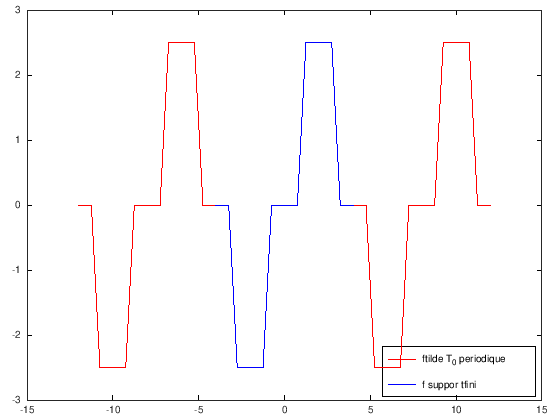

In [50]:
ftilde = @(t) f(mod(t+T0/2,T0)-T0/2);
tt=-1.5*T0:T0/32:1.5*T0;
plot(tt,ftilde(tt),'r'); hold on;
plot(t,f(t),'b');
legend(["ftilde T_0 periodique";"f suppor tfini"],"Location","southeast")


## Exercice 3  pour le TP
---


| Revenir à la [page déroulement](Readme.md) |
|-------------|

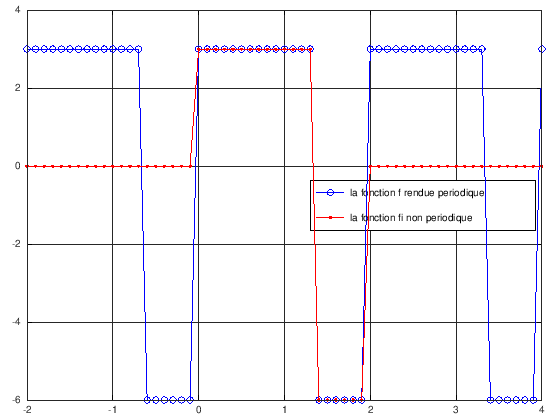

In [1]:
A=3;
T0=2;

u = @(t) t>=0; %fonction de heaviside (astuce : vrai = 1.0 )
porte = @(a,b,t) u(t-a) - u(t-b);  % fonction porte sur [a b[
porte = @(a,b,t) (t>=a) .* (t<=b); % fonction porte sur [a b]


fi=@(t) A*porte(0,2*T0/3,t)-2*A*porte(2*T0/3,T0,t) ;
% f(x) de l'exo mais juste entre [0 T0]

f = @(t) fi(mod(t ,T0)) ; %fi(x) rendue périodique => f(x)

Te=0.1;
t=-T0:Te:2*T0;  % vecteur des échantillons de temps
f_de_t = f(t) ;   % vecteur contenant [f(-T0) f(-T0+0.1) f(-T0+0.2) ... f(2T0))]

plot(t,f(t),'o-b');
grid on; hold on;
plot(t,fi(t),'.-r'); %juste une impulsion en rouge
legend(['la fonction f rendue periodique',
        'la fonction fi non periodique'],"location","east");

## Spectre analytique
On définit les coefficients analytiquement, et on trace le spectre de raies.
On peut donner les formules analytiques trouvées sous forme de fonction anonymes a, b, c.

En TP vous ferez un programme approchant ces valeurs numériquement et les stockant dans un tableau a(k), b(k), c(k) pour les premiers k donnés.

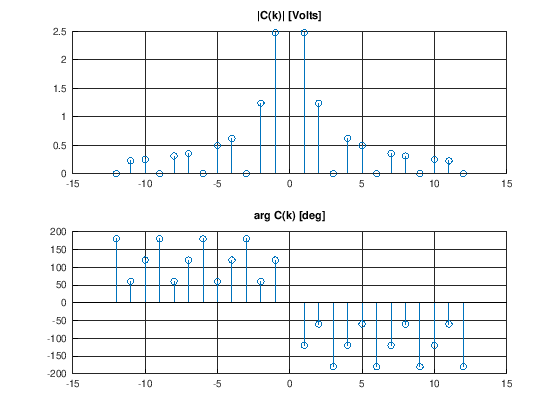

In [2]:
a = @(k) 3*A./k/pi .* sin(4/3*pi*k) ; %formule a(k) analytique calculée
b = @(k) 3*A./k/pi .* (1-cos(4/3*pi*k)) ; %formule b(k) analytique calculée
c = @(k) (a(k)-i*b(k))/2; % formule d'euler !

k = -12 : 12;

subplot(211)
    % deux rangées et une colone de graphiques
    %   on se met dans le graphique 1 => 2 1 1 
stem(k,abs(c(k)));
grid on; title('|C(k)| [Volts]')

subplot(212) % on passe dans le graphique 2
stem(k,arg(c(k))/pi*180);
grid on;title('arg C(k) [deg]')

En TP vous calculerez numériquement la valeur des $c(n), a(n), b(n)$ pour quelques valeurs de $n$.  
Ce script devra donner les mêmes valeurs que la formule trouvée analityquement.

> l'avantage est que ce script pourra calculer des SdF dont on n'a pas de résultat analytique car :
> - il n'y a pas de formule connue (primitive inconnue)
> - le signal n'est pas connu mathématiquement (enregistrement de valeurs)
> - on n'a pas le temps ni le talent pour le faire 

Il peut être utile de définir **vous-mêmes** les versions numériques des opérateurs :
- **intégrale** d'un vecteur de valeurs `integ = @(signal_de_t, Te) ...` 
- **produit scalaire périodique** entre deux signaux `scalp = @(gauche_de_t, droit_de_t, Te) ...` 
- **Série de Fourier** d'un signal `sdf = @(temps, signal_de_t, periode, Te, k) ...`

# Somme partielle

Et oui les séries de Fourier sont des séries de fonctions comme celles étudiées en ce moment en maths.
On définit la suite des fonctions harmoniques suivante :

$(f_n)_{n\in\mathbb{N}}$ avec $ f_n : t \mapsto a(n) \cos(n w_0 t) + b(n) \cos(n w_0 t)$ 

Et la suite des sommes partielles $\left( \sum\limits_{k=0}^{n}f_k\right)_{n\in\mathbb{N}}$ est bien la série de fonctions $F_n$.

Traçons les premiers termes de la série : la recomposition partielle de la fonction décomposée en série.

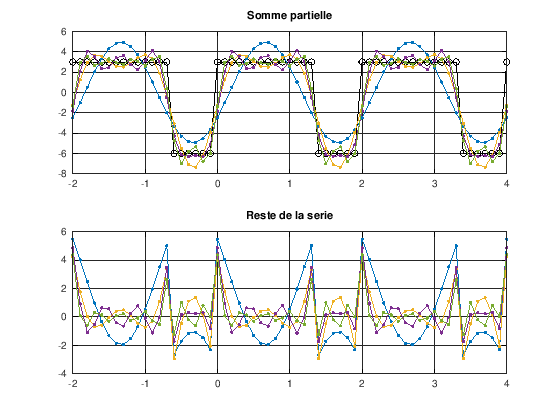

In [3]:
subplot(211)
plot(t,f(t),'o-k');
hold on; grid on;title('Somme partielle')
A0=0; % car valeur moyenne nulle.

Somme = (t==t) * A0; 
% astuce t==t = vrai = 1.0 signal constant
%   de même longueur que t. Geek !

for n = 1:5
    Somme = Somme + a(n) * cos(2*pi*n*t/T0) + b(n) * sin(2*pi*n*t/T0) ;
    
    subplot(211);
    plot(t,Somme,'.-');
    
  
    subplot(212);
    plot(t,f(t)-Somme,'.-');
    hold on; grid on;title('Reste de la serie');
    
end

## Convergence uniforme ?

On voit qu'il y a convergence simple, mais y a-t-il convergence uniforme ?

Pour cela cherchons numériquement le max du reste de la somme partielle :

$\|F_n-f\|_\infty\rightarrow 0$ quand n tends vers l'infini ? 

Que dit Dirichlet pour la valeur de la série en zéro ?

Te =  0.0010000


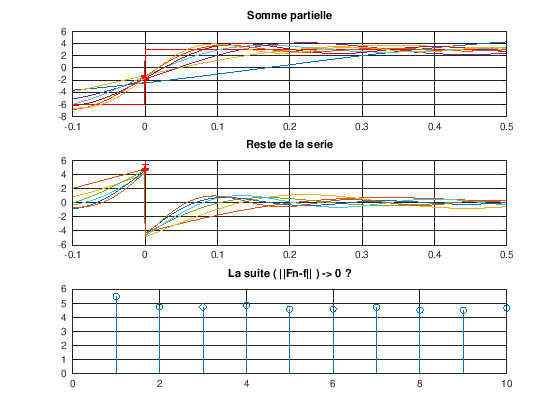

In [14]:
% on précise t autour d'une discontinuité
Te=0.001
t = -0.1:Te:0.5;

subplot(311)
plot(t,f(t),'r');
hold on; grid on;title('Somme partielle')
A0=0; % car valeur moyenne nulle.

Somme = (t==t) * A0; 
for n = 1:10
    Somme = Somme + a(n) * cos(2*pi*n*t/T0) + b(n) * sin(2*pi*n*t/T0) ;
    Reste = Somme-f(t);
    
    % max recherche la valeur maximum et l'indice de ce maximum
    [maxi,indice_max]=max(abs(Reste(1:end-1))) ;
    
    % argmax est telle que reste(t=argmax) = max de f
    argmax = t(indice_max) ; 
    
    NormeInf(n)=maxi;  % On mémorise la norme inf du reste
    
    subplot(311);
    plot(t,Somme);
    plot(argmax,Somme(indice_max),'+r')
    
  
    subplot(312);
    plot(t,Reste);
    plot(argmax,maxi,'+r')
    
    hold on; grid on;title('Reste de la serie');
    
end

%Affichons ||Fn-f|| en fonction de n pour voir si elle tends vers 0

subplot(313)
    stem(NormeInf);
    grid on;title('La suite ( ||Fn-f|| ) -> 0 ?');
 